In [10]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
%matplotlib inline
import numpy as np
import seaborn as sns
import time
import os
from __future__ import absolute_import , division , print_function

In [50]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [2]:
def model_running_time(start , end):
    hours = int((end-start)/3600)
    mins = int(((end-start)/60)%60)
    secs = int((end - start)%3600)
    print("Model Run Time: ")
    print(hours,":",mins,":",secs)
    return (hours,mins,secs)

In [8]:
train_dir = 'dataset/train/'
test_dir = 'dataset/test/'

In [33]:
## loading dataset

train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   validation_split=0.2)
training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical',
                                                subset='training')

validation_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical',
                                                subset='validation')

test_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


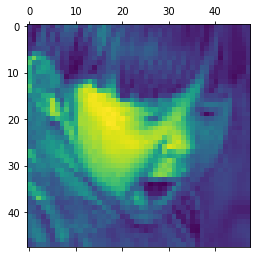

In [31]:
plt.matshow(training_set[0][0][0])

In [32]:
print( len(training_set) , len(training_set[0]) , len(training_set[0][0])) 

359 2 64


In [35]:
## labels
class_labels = training_set.class_indices
class_labels

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [59]:
## create  a model
num_classes = 7
weight_decay = 1e-3

def create_emotion_detection_model():
    model = keras.Sequential([
        keras.layers.Input(shape=(64,48,48,1)),
        keras.layers.Conv2D(filters=128 , kernel_size= (4,4) ,padding='same' , kernel_regularizer=keras.regularizers.l2(weight_decay),activation='relu'),
        keras.layers.BatchNormalization(),
        
        keras.layers.Flatten(),
        
        keras.layers.Dense(units=num_classes , activation='softmax')
    ])
    
    model.compile(
        loss='categorical_crossentropy', 
        optimizer=Adam(0.0003), 
        metrics=['accuracy'])
    
    return model

In [81]:
## create  a model
num_classes = 7
weight_decay = 1e-3

from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers

def create_emotion_detection_model():
    model = tf.keras.models.Sequential()

    model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(48,48,1)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (4,4), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation="linear"))
    model.add(Activation('elu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0003), metrics=['accuracy'])
    
    return model

In [82]:
checkpoint_path = 'saved_models/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

In [83]:
cp_callback = keras.callbacks.ModelCheckpoint(checkpoint_path,
                                            save_weights_only=True,
                                            monitor='val_accuracy',
                                            mode='max',
                                            save_freq='epoch')

In [84]:
model = create_emotion_detection_model()


In [85]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 64)        1088      
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 batch_normalization_3 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        65600     
                                                                 
 activation_1 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                      

In [66]:

model.fit(
            x =training_set , 
            epochs=10,
            callbacks=[cp_callback],
            validation_data=validation_set)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_2/conv2d_2/Conv2D/Reshape_1' defined at (most recent call last):
    File "C:\Users\Kartikeya\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Kartikeya\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Kartikeya\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\Kartikeya\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\Kartikeya\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\KARTIK~1\AppData\Local\Temp/ipykernel_896/1963464167.py", line 1, in <module>
      model.fit(
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\keras\engine\training.py", line 859, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\keras\layers\convolutional.py", line 248, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "C:\Users\Kartikeya\anaconda3\lib\site-packages\keras\layers\convolutional.py", line 233, in convolution_op
      return tf.nn.convolution(
Node: 'sequential_2/conv2d_2/Conv2D/Reshape_1'
Input to reshape is a tensor with 18874368 values, but the requested shape has 905969664
	 [[{{node sequential_2/conv2d_2/Conv2D/Reshape_1}}]] [Op:__inference_train_function_1134]

In [67]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = validation_set.n // validation_set.batch_size

In [ ]:
model.fit(x=training_set,
                 validation_data=validation_set,
                 epochs=10,
                 callbacks=[cp_callback],
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

Epoch 1/10
358/358 [==============================] - 471s 1s/step - loss: 2.2541 - accuracy: 0.3120 - val_loss: 2.2930 - val_accuracy: 0.2688
Epoch 2/10
358/358 [==============================] - 431s 1s/step - loss: 1.9205 - accuracy: 0.4048 - val_loss: 1.8554 - val_accuracy: 0.4373
Epoch 3/10
174/358 [=============>................] - ETA: 3:34 - loss: 1.7955 - accuracy: 0.4488